# Udacity Project 1: Explore Weather Trends
## Denver Temperatures Versus Global Temperatures

## Project Outline

For this project, I will be doing an observation on the temperature trends for Denver along with global temperature trends. I will be looking for both similarities along with differences between global temperature and Denver temperature. 

1. Acquiring this data involved extracting data from two different tables in a database. Global data was extracted from one table. Selecting the information for Denver's data was a two-step process. First, I checked to see what city was closest to where I live in the 'city_list' table followed by selecting the Denver data by using a WHERE clause in the query.

2. Once I had extracted the data that I needed, I saved the file Excel file as a 'csv' file and uploaded the data into a folder in Jupyter Notebook.

3. I decided to use Jupyter Notebook to complete this project using Python and its libraries to include Pandas, Numpy, Matplotlib, and Seaborn. 

4. There was minimal data cleaning in this project other than filling in some missing values and extracting columns I did not need. I decided to leave the temperatures as Celsius. 

5. A 10-year moving average was used to smooth out the data to make for better representation of observing any temperature trends.

6. A line chart was created using Matplotlib with enhanced presentation using Seaborn.

7. I concluded by giving some details about the trends observed in the data.

## Selecting the Data

To obtain the data, I had to run three different queries. The data was retrieved from the temperatures database via Udacity.

1. The first dataset was selected from the global_data table. The following query was used.

SELECT * FROM global_data

2. To retrieve my second dataset, I first needed to look through the city_list table to see if my selected city was in the database. The following query was used.

SELECT * FROM city_list
WHERE city = 'Denver';

3. Finally, I used the following query to retrieve the average temperatures for my selected city.

SELECT * FROM city_data 
WHERE city = 'Denver';

These are the syntax of the queries I used to retrieve my data. However, how you select your data can make your data analysis process go much quicker. The following query could have been used to help save time from having to drop unnecessary columns and rows.

SELECT year, avg_temp FROM city_data 
WHERE year >= 1820 AND city = 'Denver';


In [1]:
# Importing the necessary libraries used for this project
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # For enhancing the line graph presentation

In [2]:
# Uploading the 'csv' files as  Pandas dataframes
globe = pd.read_csv("C:\\Users\\teamd\\GitHub Projects 3\\global_temps-LAPTOP-E0JSVV53.csv")
denver = pd.read_csv("C:\\Users\\teamd\\GitHub Projects 3\\denver_temps.csv")

In [3]:
# Inspecting the data
globe.head(1)

,year,avg_temp,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1750,8.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
denver.head(1)

,year,city,country,avg_temp
0,1775,Denver,United States,10.32


## Data wrangling

In [5]:
# Begin by dropping unwanted columns and only keeping the 'year' and 'avg_temp' columns

In [6]:
globe.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)

In [7]:
globe.head(1)

,year,avg_temp
0,1750,8.72


In [8]:
denver.drop(columns=['city', 'country'], inplace=True)
 

In [9]:
denver.head(1)

,year,avg_temp
0,1775,10.32


In [10]:
# Check for missing values
globe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [11]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
year        239 non-null int64
avg_temp    196 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB


It looks like there are some missing values for the average temperature in Denver. It is possible that the city may not have kept records for as long as temperatures have been recorded globally. I will therefore only compare the global and Denver temperature for where there is data in both datasets. The first step is to figure out where there is consistent record keeping. This can be done by looking for null values and seeing how many null values there are before a consistent record is kept.

In [12]:
denver.isnull().sum()

year         0
avg_temp    43
dtype: int64

There are no null values for the year, but there are 43 for the average temperature. It is possible there may be missing values in later years, but first I will check if these 43 null values occur without any gap.

In [13]:
denver.head(47)

,year,avg_temp
0,1775,10.32
1,1776,6.23
2,1777,NaN
3,1778,NaN
4,1779,NaN
5,1780,NaN
6,1781,NaN
7,1782,NaN
8,1783,NaN
9,1784,NaN


In [14]:
denver.tail(1)

,year,avg_temp
238,2013,11.21


Figuring that the first sign of consistent record keeping for Denver started in 1820, I plugged in 47 as an argument using the head function to check and see if the 43 null values due occur in a row. With only having for rows contain data and the other 43 having null values. I will be doing the analysis on global and Denver temperatures from 1820 through 2013. There will be no need for filling in missing values since there are no null values in the global temperature dataset.

In [15]:
den_data = denver[45:] # Selecting only the rows that will be used in this analysis

In [16]:
globe[globe['year'] == 1820] 
# Determining the index location for the year 1820 and selecting data from this row until year 2013 

,year,avg_temp
70,1820,7.62


In [17]:
globe.tail(1)

,year,avg_temp
265,2015,9.83


In [18]:
globe_data = globe[70:264] # Only selecting for years 1820 - 2013

In [19]:
globe_data.head(1)

,year,avg_temp
70,1820,7.62


In [20]:
globe_data.tail(1)

,year,avg_temp
263,2013,9.61


Creating an avg_temp Pandas series for each dataset and converting them to an Numpy array to enable 
doing the 10-year moving average.

In [21]:
globe_array = globe_data['avg_temp'].to_numpy()

In [22]:
globe_array # Checking to see that a Numpy array is displayed

array([7.62, 8.09, 8.19, 7.72, 8.55, 8.39, 8.36, 8.81, 8.17, 7.94, 8.52,
       7.64, 7.45, 8.01, 8.15, 7.39, 7.7 , 7.38, 7.51, 7.63, 7.8 , 7.69,
       8.02, 8.17, 7.65, 7.85, 8.55, 8.09, 7.98, 7.98, 7.9 , 8.18, 8.1 ,
       8.04, 8.21, 8.11, 8.  , 7.76, 8.1 , 8.25, 7.96, 7.85, 7.56, 8.11,
       7.98, 8.18, 8.29, 8.44, 8.25, 8.43, 8.2 , 8.12, 8.19, 8.35, 8.43,
       7.86, 8.08, 8.54, 8.83, 8.17, 8.12, 8.27, 8.13, 7.98, 7.77, 7.92,
       7.95, 7.91, 8.09, 8.32, 7.97, 8.02, 8.07, 8.06, 8.16, 8.15, 8.21,
       8.29, 8.18, 8.4 , 8.5 , 8.54, 8.3 , 8.22, 8.09, 8.23, 8.38, 7.95,
       8.19, 8.18, 8.22, 8.18, 8.17, 8.3 , 8.59, 8.59, 8.23, 8.02, 8.13,
       8.38, 8.36, 8.57, 8.41, 8.42, 8.51, 8.53, 8.73, 8.52, 8.63, 8.24,
       8.63, 8.72, 8.71, 8.34, 8.63, 8.52, 8.55, 8.7 , 8.86, 8.76, 8.76,
       8.77, 8.73, 8.76, 8.85, 8.58, 8.68, 8.8 , 8.75, 8.59, 8.37, 8.63,
       8.64, 8.87, 8.56, 8.63, 8.28, 8.73, 8.77, 8.73, 8.58, 8.8 , 8.75,
       8.86, 8.41, 8.53, 8.6 , 8.7 , 8.52, 8.6 , 8.

In [23]:
denver_array = den_data['avg_temp'].to_numpy()

In [24]:
denver_array.shape # Making sure an array would have been displayed

(194,)

The next step is to calculate the 10-year moving average for both arrays.

In [25]:
# Creating a function to calculate the moving average
# The first parameter is the selected array.
# The second parameter is designating what number is used for the moving average.
# 'valid' refers to calculating from the 10th variable onward if using a 10-year moving average
def moving_avg(nums, window): 
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(nums, weights, 'valid') 
    return smas

In [26]:
# Calculating the 10-year moving average for both arrays
denver_clean = moving_avg(denver_array, 10)
denver_clean.shape # Should print out 185 since the first 10 values are not considered 'valid'

(185,)

In [27]:
global_clean = moving_avg(globe_array, 10)
global_clean.shape

(185,)

In [28]:
# Creating an array consisting of years 1820-2013 for the x-axis
years = np.arange(1829,2014) # Will not include the years 1820 - 1828 since they were not considered 'valid' 
# for calculation purposes


In [29]:
years 

array([1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839,
       1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850,
       1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861,
       1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872,
       1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883,
       1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894,
       1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 19

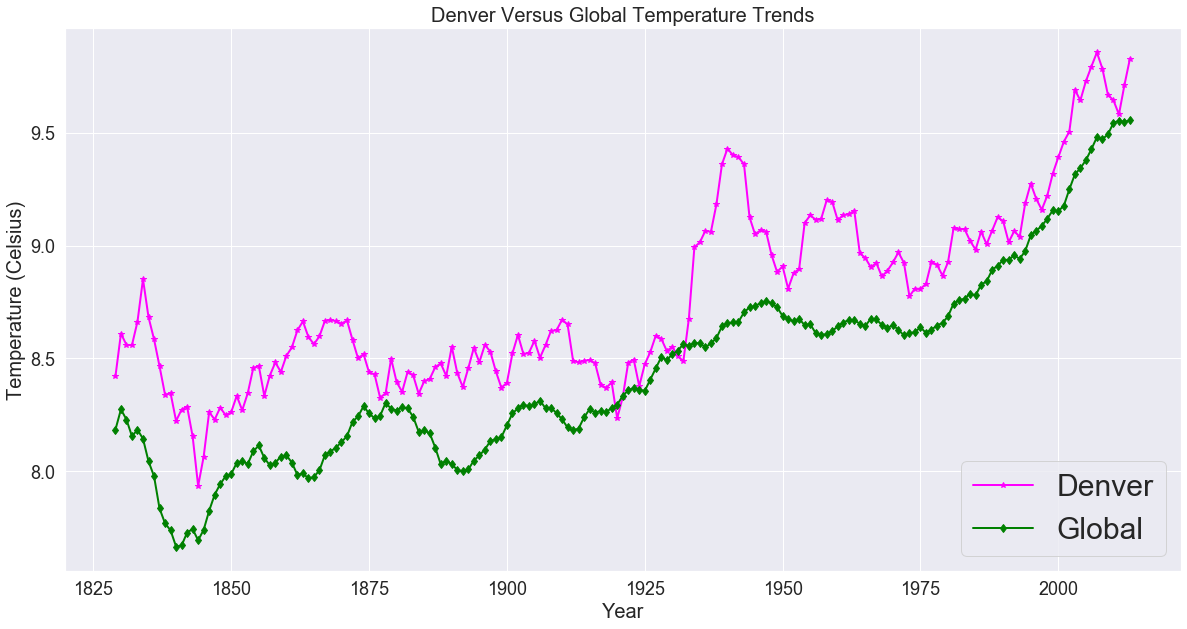

In [30]:
# Creating a line chart to interpret the results
plt.figure(figsize=(20, 10))
ax=plt.subplot()
ax.tick_params(labelsize=18) # Setting label sizes for easier legibility
plt.plot(years, denver_clean, linewidth=2, marker='*', color='magenta', label = 'Denver') 
plt.plot(years, global_clean, linewidth=2, color='green', marker='d', label='Global')
plt.title('Denver Versus Global Temperature Trends', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature (Celsius)', fontsize=20)
plt.legend(loc='lower right', fontsize=30)
plt.show();

* The above figure shows that both the average global temperature and average temperature in Denver have been on an upward trend since around the 1840s on up 2013 and perhaps even the present. 
* Since around 1975, both Denver's average temperature and the average global temperature appear to have taken a steeper upward trend compared to years prior. 
* On average, Denver's temperature has been warmer than the average global temperature over the years with a couple of exceptions as depicted in the chart above. 
* Although this line-chart plotted 10-year moving averages, it does appear that Denver's average temperature has experienced more fluctuations when compared to the average global temperature. 
* One could theorize that since Denver is near the high Rocky Mountain Range, the mountain range may have some influence on Denver's weather and thus could be the reason for the increased fluctuations in average temperature. 
* Given this observation, it does appear that the average temperature is increasing both globally and locally. 